In [1]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt

## Merging a 12 months sales file into a single csv file 

In [4]:
files = [file for file in os.listdir('./Sales_Data') ]

# import os for this first
# for file in files:
#     print(file)


all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    frames = [all_months_data, df]
    all_months_data = pd.concat(frames)


# all_months_data.head()
# to a new csv through this ftn  
all_months_data.to_csv("all_data.csv", index=False)

## Read New File all_data.csv

In [5]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## DATA CLEANING 

## 1. DROP ROWS OF NAN

In [7]:
# FETCH ALL NAN 

rows_with_nan = all_data[all_data.isna().any(axis=1)]
# print(rows_with_nan)

In [11]:
# ROWS_WITH_NAN
# drop   by  any or all 


# all_data_extra1 = all_data 

all_data = all_data.dropna(how='all')
# all_data.head()

## 2. CLEAN DATA CONTAING 'OR' IN ORDER DATE OR MONTH

In [19]:
## FETCH ALL ORDER DATE WITH 'OR' 
# all_data_extra2  = all_data

# temp_df3 = all_data[ all_data['Order Date'].str[0:2] == 'Or']

temp_df = all_data[ all_data['Order Date'].str[0:2] == 'Or' ]
# temp_df.head()

# all_data.head()

## 2a ADD ECEPTION FOR 'OR' IN ORDER DATE 

In [20]:
# all_data_extra3 = all_data

# all_data_og.head()

## extra for refering 
# temp_df = all_data[ all_data['Order Date'].str[0:2] != 'Or' ]
# temp_df.head()

In [21]:
all_data = all_data[ all_data['Order Date'].str[0:2] != 'Or' ]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## CONVERT DATA TO CORRECT DATA TYPE 

In [24]:
# all_data_extra4 = all_data



all_data['Quantity Ordered'] =  pd.to_numeric( all_data['Quantity Ordered'] ) 
all_data['Price Each'] =  pd.to_numeric( all_data['Price Each'] )
# all_data.head()

C:\Users\Jatin\AppData\Local\Temp\ipykernel_9020\1516362272.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] =  pd.to_numeric( all_data['Quantity Ordered'] )
C:\Users\Jatin\AppData\Local\Temp\ipykernel_9020\1516362272.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] =  pd.to_numeric( all_data['Price Each'] )


## END OF DATA CLEANING 

#### AUGMENTED DATA WITH ADDITIONAL COLUMNS 

#### TASK 2. ADD MONTH COLOUMN  

In [31]:
#### GET MONTH USING STR[0:2]

# all_data_extra5  = all_data

# all_data['Month'] = all_data['Order Date'].str[0:2]
#  after creating month col comment the above line 

all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

## TASK 3 ADD A SALES COLUMN

In [35]:
# all_data_extra5  = all_data


all_data['Sales'] =  all_data['Quantity Ordered'] * all_data['Price Each']
# all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## TASK 4 ADD CITY COLUMN 

In [42]:
# all_data_extra6 = all_data

# all_data_test = all_data

# working 1
def get_city(address):
    return  address.split(',')[1]

# all_data_test ['City_test1']  = all_data_test ['Purchase Address'].apply( lambda x : get_city(x) )


# working 2
# done 
# all_data_test['City'] = all_data_test['Purchase Address'].apply(lambda x: x .split(',') [1]   )

# all_data_test.head()

############################# DONT USE THIS IN THIS 
# all_data = all_data.drop(columns = 'month', inplace=True )   // carefully use this it drops the whole data  
# all_data.head()
############################# 

In [44]:
all_data_test.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City_test1,City_test2,City_test,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas,917 1st St,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston,682 Chestnut St,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles,669 Spruce St,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles,669 Spruce St,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles,333 8th St,Los Angeles


In [47]:
# all_data_extra35 = all_data_test


# all_data_test.drop( columns = 'City_test2', inplace = True )    
# use inplace true to remove columns from df       


# all_data_test.head()

## Question 1. BEST MONTH FOR SALES  ? WHAT WAS EARNED AT THAT MONTH? 

In [49]:
# all_data_extra20 = all_data_test
# all_data_test.head()

In [53]:
# float64 to int   
# all_data = all_data_test

# all_data_extra51 = all_data 


# all_data.groupby('Month').sum()['Sales']   # extra ---  dont use this  

# all_data['Sales'] = all_data['Sales'].astype('int32')

result = all_data.groupby('Month').sum()
print(result['Sales'])

Month
1     1815143
2     2193165
3     2795907
4     3377215
5     3140375
6     2567871
7     2637209
8     2235667
9     2088915
10    3721615
11    3186604
12    4594929
Name: Sales, dtype: int32


In [59]:
# all_data_3 = all_data
# all_data_3.head()

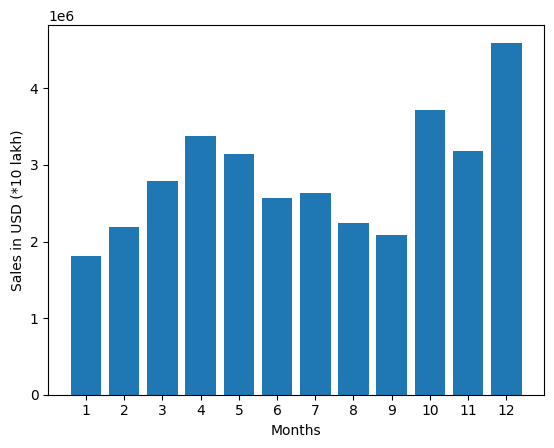

In [58]:
#  ------------------- NOT WORKING 
# formatter = ScalarFormatter(useMathText=False)
# plt.gca().yaxis.set_major_formatter(formatter)
# formatter = ticker.ScalarFormatter(useMathText=False)
# --------------------------------------------------


import matplotlib.pyplot as plt         
# import ScalarFormatter
months = range(1,13)

plt.bar(months, result['Sales'])  
plt.xticks(months)
plt.ylabel('Sales in USD (*10 lakh)')
plt.xlabel('Months')

plt.show()

In [61]:
# backup
# all_data_22 = all_data 
# all_data_22.head()

##### QUESTION 2. WHAT CITY HAS THE HIGHEST NUMBER OF SALES ?

In [62]:
results_city = all_data.groupby('City').sum()
print(results_city['Sales'])

City
 Atlanta          2784555
 Austin           1812297
 Boston           3646904
 Dallas           2757017
 Los Angeles      5430629
 New York City    4645903
 Portland         2311293
 San Francisco    8229136
 Seattle          2736881
Name: Sales, dtype: int32


In [64]:
# extra 
# results_city

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta,1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794,2784555
Austin,1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829,1812297
Boston,1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141112,3646904
Dallas,1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620,2757017
Los Angeles,1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325,5430629
New York City,1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932,4635370.83,04/04/19 20:3004/27/19 00:3004/11/19 10:2304/1...,"149 Dogwood St, New York City, NY 10001433 Hil...",175741,4645903
Portland,1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,14053,2307747.47,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ...",87765,2311293
San Francisco,1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239,8211461.74,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will...",315520,8229136
Seattle,1765631765681765881766121766241766541766631766...,Bose SoundSport HeadphonesLightning Charging C...,16553,2733296.01,04/02/19 07:4604/15/19 12:1804/02/19 04:0004/0...,"668 Center St, Seattle, WA 98101438 Elm St, Se...",104941,2736881


In [65]:
all_data_test = all_data

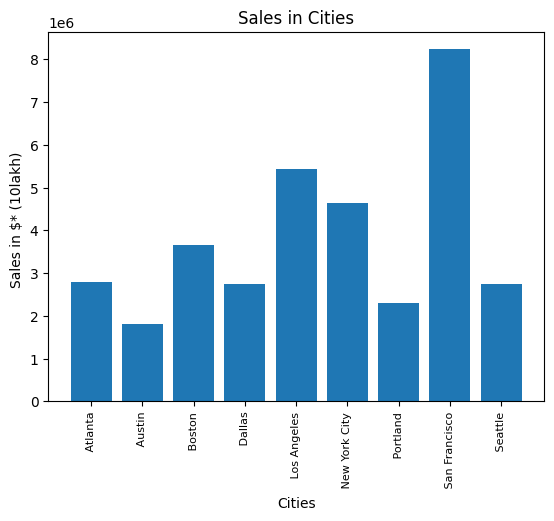

In [68]:
cities = [city for city , df in all_data.groupby('City')  ]

# print(cities)

plt.bar( cities, results_city['Sales'])
plt.xticks( cities, rotation = 'vertical' , size = 8 )
plt.title ('Sales in Cities')
plt.xlabel('Cities')
plt.ylabel('Sales in $* (10lakh) ')

plt.show()

 #### QUESTION 3.  What time we display advertize to maximize likelihood of customer's buying product ?

In [73]:
# CREATE 2 NEW COLUMNS  
# all_data_test_99 = all_data 

#  COLUMN TO DATETIME  into a new column ==> Order Date2
all_data['Order Date2'] =   pd.to_datetime( all_data['Order Date'] )

# GET Hour from Column ==> Order Date2
all_data['Hour'] = all_data['Order Date2'].dt.hour

# all_data.head()

In [80]:
# all_data_test_98 = all_data 

# extra 
# hours_test = [ hour for hour ,df in all_data.groupby( 'Hour' ) ]

hours_test1 = [ hour for hour ,df in all_data.groupby( ['Hour'] ) ]
print(hours_test1)

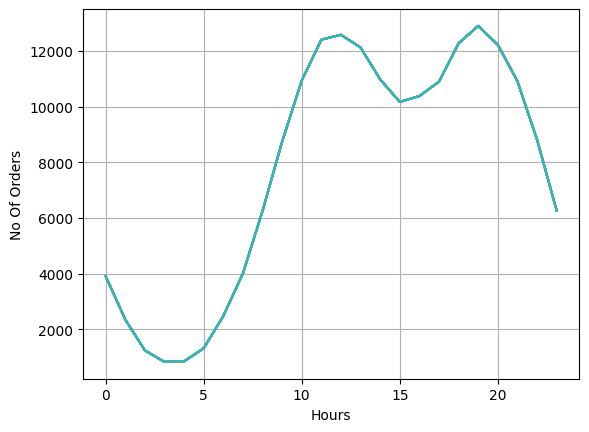

In [79]:
plt.plot( hours_test1, all_data.groupby( all_data['Hour'] ).count()  )

plt.xlabel('Hours')
plt.ylabel('No Of Orders')
plt.grid(True)

plt.show()

QUESTION 4. WHAT PRODUCTS ARE MOST OFTEN SOLD ? 

In [83]:
all_data_test97 = all_data
all_data_test96 = all_data
all_data_test95 = all_data

In [84]:
# FROM HERE      get all duplicated rows by order date
# order date duplicated rows

# df1 = all_data_test97[ all_data_test97['Order Date'].duplicated(keep = False) ]
# df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Date2,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23,Dallas,2019-04-19 08:46:00,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99,Boston,2019-04-07 22:30:00,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600,Los Angeles,2019-04-12 14:38:00,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11,Los Angeles,2019-04-12 14:38:00,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11,Los Angeles,2019-04-30 09:27:00,9


In [88]:
# df1['Grouped'] = df1.groupby('Order ID') ['Product'].transform( lambda x: ','.join(x) )  
# df1.head()


In [ ]:
# remove duplicated and keep only single row for each order      [Order Id] [Grouped] 
df1 = df1[ ['Order ID', 'Grouped'] ] .drop_duplicates()  

# df1.head(100)

In [90]:
from itertools import combinations 
from collections import Counter 

count = Counter()

for row in df1['Grouped']:
    row_list = row.split(',')
    count.update (Counter(combinations(row_list, 2) ) )


count.most_common(10)


for key, value in  count.most_common(10):
    print( key, value )


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


QUESTION 5. WHAT PRODUCT SOLD THE MOST AND WHY DOU YOU THINK IT SOLD THE MOST ? 

In [92]:
all_data_test95 = all_data
all_data_test94 = all_data

In [106]:
# all_data.head()

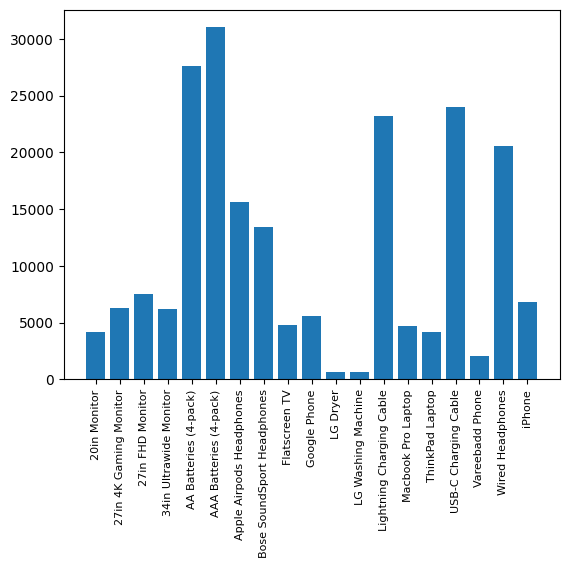

In [109]:
product_group = all_data_test95.groupby('Product')
quantity_ordered = product_group.sum(numeric_only=True)['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

# print(quantity_ordered)

In [110]:
# print(all_data.dtypes)

In [100]:
all_data_test93 = all_data
all_data_test92 = all_data 

In [105]:
# all_data_test93 

# all_data['Product'] = all_data['Product'].astype(str)

# print(all_data.dtypes)

# all_data_test93.loc[:, 'Product'] = all_data_test93['Product'].astype(str)

# print(all_data_test93['Product'].dtypes)



object
